# Import Packages

The import package section is crucial because it sets up the script with all the external libraries and tools required for the project. Each imported package provides specific functionality, and importing them ensures that we can use pre-built methods and utilities instead of writing everything from scratch.

In [1]:
!pip install Sastrawi --quiet

# Importing tools for dataset management
import kagglehub  # Used to download datasets from Kaggle directly into the script.
import os  # Provides functions to interact with the operating system, such as file and directory management.
import time  # Used to handle and measure time-related operations.

# Importing tools for data manipulation and visualization
import pandas as pd  # A powerful library for data analysis and manipulation, often used to handle tabular datasets.
import numpy as np
import matplotlib.pyplot as plt  # A library for creating static, animated, and interactive visualizations.
import seaborn as sns  # Built on top of matplotlib, it provides a high-level interface for creating attractive statistical graphics.

# Importing tools for text preprocessing
import nltk  # A popular library for natural language processing tasks, such as tokenization, stemming, and stopword removal.
from nltk.corpus import stopwords  # Used to access pre-defined stopword lists for various languages.
import string  # Provides a collection of string constants, such as punctuation, to assist in text cleaning.

# Importing tools for generating word clouds
from wordcloud import WordCloud, STOPWORDS  # Used to create visualizations that display words based on their frequency.
import matplotlib.pyplot as plt  # Redundant re-import; already imported above, but required if in a separate module for the word cloud.

# Importing tools for machine learning and model training
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing subsets.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Used to evaluate the model performance.

# Importing libraries for working with BERT
from transformers import (
    BertTokenizer,  # A tokenizer specifically designed for BERT to prepare text data for the model.
    BertForSequenceClassification,  # A pre-trained BERT model fine-tuned for text classification tasks.
    Trainer,  # A high-level API from Hugging Face for training and evaluating models.
    TrainingArguments,  # Used to define training configurations like learning rate, epochs, batch size, etc.
    TFBertForSequenceClassification,  # TensorFlow implementation of BERT for sequence classification tasks.
)
import tensorflow as tf  # A deep learning framework used to define and train machine learning models.

# Defining dataset directory
DATASET_ROOT_DIR = "/content/datasets"  # Specifies the root directory where datasets will be stored.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


# Loading Dataset

The data loading section is responsible for fetching and preparing the dataset for further analysis and model training. It involves reading the dataset from a specified source, ensuring it is correctly loaded into memory, and performing basic checks to verify its structure and content.

In [2]:
# Record the start time of the operation to measure how long it takes
start = time.time()

# Download the latest version of the dataset from Kaggle
# The function downloads the dataset "indonesiafalsenews" from the Kaggle repository by the user "muhammadghazimuharam".
# Returns the local path where the dataset is stored after download.
path = kagglehub.dataset_download("muhammadghazimuharam/indonesiafalsenews")

# Print the path where the dataset files were downloaded to verify the download location
print("Path to dataset files:", path)

# Check if the target directory specified by `DATASET_ROOT_DIR` exists
# If it doesn't exist, create it to ensure there's a destination for moving the downloaded files.
if not os.path.exists(DATASET_ROOT_DIR):
    os.makedirs(DATASET_ROOT_DIR)  # Create the directory recursively if it doesn't already exist

# Use the `os.system` command to copy all files from the downloaded dataset directory (`path`) to the target directory (`DATASET_ROOT_DIR`)
# The command effectively moves the dataset from its temporary download location to the intended working directory.
os.system("cp -r {}/* {}".format(path, DATASET_ROOT_DIR))

# Print the final path to confirm that the dataset files are now stored in the target directory
print("Path to dataset files:", path)

100%|██████████| 548k/548k [00:00<00:00, 79.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadghazimuharam/indonesiafalsenews/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadghazimuharam/indonesiafalsenews/versions/1


In [3]:
# Define the path to the training dataset
# The path is constructed dynamically by combining the `DATASET_ROOT_DIR` with the filename "Data_latih.csv".
# This ensures the script can locate the training dataset regardless of where the root directory is set.
train_data = "{}/Data_latih.csv".format(DATASET_ROOT_DIR)

# Define the path to the testing dataset
# Similarly, the script constructs the path for the testing dataset by appending "Data_uji.csv" to `DATASET_ROOT_DIR`.
# This allows for consistent management of file locations during experimentation.
test_data = "{}/Data_uji.csv".format(DATASET_ROOT_DIR)

In [4]:
# Load the training dataset into a pandas DataFrame
# Reads the CSV file specified by the `train_data` variable into a structured DataFrame called `train_df`.
# The DataFrame provides a tabular structure that is easy to manipulate and analyze.
train_df = pd.read_csv(train_data)

# Display the first five rows of the training dataset
# This command is useful for a quick inspection of the data, allowing you to verify its structure, column names, and some initial values.
train_df.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


**Feature Definitions**

1. **ID**  
   Represents the unique identifier for each data entry. This ensures every record can be distinctly referenced.

2. **Label**  
   Indicates the authenticity of the news:  
   - `1`: Fake news.  
   - `0`: Factual/real news.

3. **Tanggal**  
   The publication date of the news. This provides temporal context for the dataset.

4. **Judul**  
   The title or headline of the news article. Often used to grab readers' attention and summarize the content.

5. **Narasi**  
   The full text or narrative of the news article. This is the primary content used for analysis and classification.

6. **Nama File Gambar**  
   The file name of the associated image, if available. This feature may be used for linking or visual context.


In [5]:
# Load the testing dataset into a pandas DataFrame
# Reads the CSV file specified by the `test_data` variable into a structured DataFrame called `test_df`.
# The DataFrame provides a tabular structure for the testing data, allowing easy analysis and processing.
test_df = pd.read_csv(test_data)

# Display the first five rows of the testing dataset
# This allows for a quick inspection to verify the data's structure, column names, and a sample of the data points.
test_df.head()

,ID,tanggal,judul,narasi,nama file gambar
0,238057,13-Jul-20,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg
1,238158,6-Jul-20,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg
2,238865,22-Apr-20,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg
3,248298,22-Oct-19,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg
4,255176,1-May-20,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg


In [6]:
# Access the value in the "narasi" column at the 3rd index (4th row) of the testing dataset
# This line retrieves the value from the "narasi" column for the data entry at index 3 (keeping in mind that indexing starts at 0).
# The "narasi" column contains the text or narrative of the news article, and this specific line extracts the text of the 4th news article in the `test_df`.
test_df["narasi"][3]


'Mulai Hari ini di RSCM mulai diPraktekkan Penyedotan Plug (Sumbatan) di Vena/Saluran Darah Ke Jantung, jadi Tidak Pake Ring atau Bypass lagi.\n \n Semoga Teknologi ini Membawa Khabar Gembira…, Khususnya bagi mereka yg Dideteksi Adanya Sumbatan tersebut. Jantung Koroner Tidak Selalu Harus Pasang Ring atau Operasi.'

# Exploratory Data Analysis (EDA) and Data Preprocessing

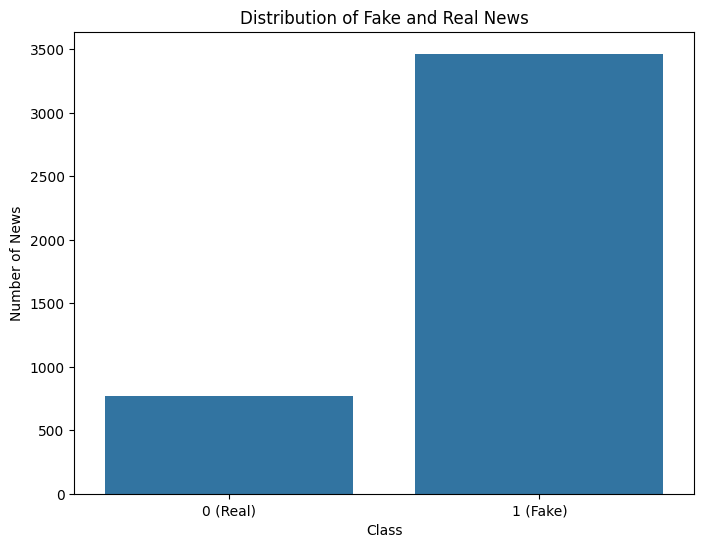

Real news is only 18.10% on the dataset


In [7]:
# Create a dictionary to hold the count of each class (Real vs Fake) in the training dataset
# The 'label' column of the `train_df` DataFrame is used to count occurrences of the values 0 (Real) and 1 (Fake).
# The result is stored in the `class_distribution` dictionary with keys representing the class labels ("0 (Real)" and "1 (Fake)") and values representing the counts.
class_distribution = {
    '0 (Real)': train_df["label"].value_counts()[0],  # Count the number of real news articles (label = 0)
    '1 (Fake)': train_df["label"].value_counts()[1]   # Count the number of fake news articles (label = 1)
}

# Convert the dictionary into a pandas DataFrame for easier plotting
# The `list(class_distribution.items())` converts the dictionary into a list of tuples, which is then converted into a DataFrame.
# The DataFrame has two columns: 'Class' (which will contain the class names) and 'Count' (which will contain the corresponding counts).
distribution_df = pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count'])

# Plot the distribution of fake vs real news using a bar plot
# A figure size of (8, 6) is set for the plot to ensure the chart is clearly visible.
# Seaborn's barplot function is used to create the plot, with 'Class' on the x-axis and 'Count' on the y-axis. The 'viridis' color palette is used for styling.
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.barplot(x='Class', y='Count', data=distribution_df)  # Create the bar plot
plt.title('Distribution of Fake and Real News')  # Add a title to the plot
plt.xlabel('Class')  # Label the x-axis
plt.ylabel('Number of News')  # Label the y-axis
plt.show()  # Display the plot

distribution_real = (distribution_df[distribution_df['Class']=='0 (Real)']['Count']/distribution_df.Count.sum()).values[0]*100
print(f'Real news is only {distribution_real:.2f}% on the dataset')

The analysis of the label distribution reveals a significant class imbalance within the dataset. Specifically, real news articles account for only 18.10% of the total dataset, while the remaining 81.90% consists of fake news articles. This imbalance is an important consideration when developing the classification model, as it could impact the model’s ability to accurately classify real news articles.

## Undersampling

In many real-world datasets, the class distribution is imbalanced. For example, when working with fake news detection, the dataset might have significantly more "Real News" (82%) compared to "Fake News" (18%). This imbalance can negatively impact model performance because:

The model may bias predictions toward the majority class.
The minority class might be underrepresented during training, leading to poor detection.
To address this, we can undersample the majority class to create a balanced dataset with a 50:50 distribution.

In [8]:
df_label_0 = train_df[train_df['label'] == 0]
df_label_1 = train_df[train_df['label'] == 1]

# Find the smaller group size
min_size = min(len(df_label_0), len(df_label_1))

# Randomly undersample the larger group
df_label_0_sampled = df_label_0.sample(n=min_size, random_state=42)
df_label_1_sampled = df_label_1.sample(n=min_size, random_state=42)

# Combine the balanced dataset
balanced_df = pd.concat([df_label_0_sampled, df_label_1_sampled])

# Shuffle the dataset (optional)
train_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

## Remove Stop word form `judul` and `narasi`

This section removes stop words (common, low-value words) from the judul (title) and narasi (content) columns. By eliminating these words, we reduce noise and improve the quality of the text data, helping the model focus on more meaningful terms. This process can enhance model performance by making the features more relevant and efficient, while also reducing computational overhead.

In [9]:
# Download the 'stopwords' corpus from the NLTK library, which contains common stop words for multiple languages.
nltk.download('stopwords')

# Retrieve the list of stop words for the Indonesian language from the NLTK 'stopwords' corpus.
stop_words = stopwords.words('indonesian')

# Append the word "yg" (a common abbreviation in Indonesian) to the list of stop words.
stop_words.append("yg")

# Print the list of stop words, including the newly added "yg", for verification.
print(stop_words)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Function to remove stop words from a given text
def remove_stop_words(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stop words from the text
    return " ".join(filtered_words)  # Join the filtered words back into a string

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation using string translation

# Apply the function to the 'title' column in the training dataframe
train_df['cleaned_title'] = train_df['judul'].str.lower().apply(remove_stop_words).apply(remove_punctuation)
# Apply the function to the 'description' column in the training dataframe
train_df['cleaned_description'] = train_df['narasi'].str.lower().apply(remove_stop_words).apply(remove_punctuation)

# Apply the same cleaning functions to the test dataframe
test_df['cleaned_title'] = test_df['judul'].str.lower().apply(remove_stop_words).apply(remove_punctuation)
test_df['cleaned_description'] = test_df['narasi'].str.lower().apply(remove_stop_words).apply(remove_punctuation)


## Word Frequencies on **Judul** and **Narasi**

In the **"Judul"** and **"Narasi"** section, the script focuses on analyzing the frequencies of words that appear in the **"judul"** (title) and **"Narasi"** column of the dataset. Here's an overview of what is being done and what you should expect:

1. **Text Data (Judul and Narasi)**:
   - The **"judul"** column contains the titles of news articles in the dataset. These titles are essential for understanding the key terms associated with each news article.

2. **Word Frequency Analysis**:
   - By analyzing the frequency of words in the "judul" section, you can determine which words appear most often across the dataset. This helps to identify common terms or trends in the titles, which may be significant in detecting fake news (e.g., specific keywords that often appear in fake news titles).

3. **Stop Words Removal**:
   - Before performing the analysis, **stop words** (common words like "the", "is", "and", etc.) are removed from the titles. These words do not carry significant meaning and are typically excluded to focus on more meaningful words that help differentiate the content.
   
4. **WordCloud Generation**:
   - A **word cloud** is generated from the processed titles (after stop words have been removed). The size of each word in the word cloud is proportional to its frequency in the titles.
   - Larger words represent terms that appear more frequently, while smaller words appear less frequently. This visualization helps to quickly identify which words are most common in the titles of the news articles.

5. **Insights**:
   - By observing the word cloud or analyzing word frequencies, you can identify **keywords** that could be predictive of fake news versus real news. For example, you may find that certain sensational or exaggerated words appear more frequently in fake news titles, which could be valuable for building a model for hoax news detection.

6. **Usefulness in Model Building**:
   - This analysis can provide useful insights into the text structure of the news articles and help in building features for a classification model. Understanding which words are commonly associated with fake or real news can improve the accuracy of a classification model, such as one using BERT for hoax news detection.

In summary, analyzing word frequencies in the **"judul"** section helps to uncover patterns in the titles of news articles, which can be valuable for detecting fake news and understanding the language used in both fake and real news titles.


### The most frequently used words in column `Judul`

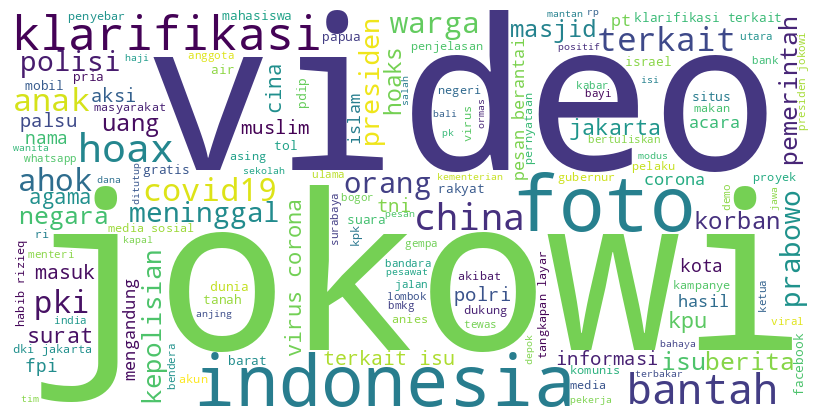

In [11]:
# Combine all the cleaned titles from the 'cleaned_title' column into a single string
text = " ".join(title for title in train_df.cleaned_title)

# Generate the word cloud from the combined text string
wordcloud = WordCloud(width=800, height=400,          # Set the width and height of the word cloud
                      background_color='white',     # Set the background color to white
                      min_font_size=10).generate(text)  # Minimum font size for words, and generate the word cloud from the text

# Create a figure for displaying the word cloud with specified size
plt.figure(figsize=(8, 8), facecolor=None)

# Display the word cloud using the image format
plt.imshow(wordcloud)

# Remove axis lines and labels to make the plot cleaner
plt.axis("off")

# Adjust the layout of the plot to remove extra padding
plt.tight_layout(pad=0)

# Show the generated word cloud plot
plt.show()

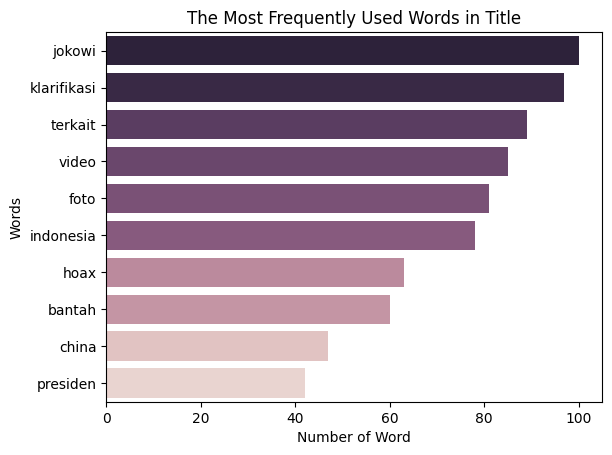

In [12]:
# Count the occurrences of each word in the 'cleaned_title' column
count_df = train_df['cleaned_title'].str.lower().str.split(' ').explode().value_counts().reset_index()

# Rename the columns to make them more descriptive
count_df.columns = ['cleaned_title', 'count']

# Remove any rows where the word is an empty string
count_df = count_df[count_df["cleaned_title"] != ""].reset_index(drop=True)

# Create a filter to exclude stop words from the word count
excluded_filter = count_df['cleaned_title'].isin(stop_words)

# Create a bar plot of the top 10 most frequent words, excluding stop words
sns.barplot(
    x = 'count',  # Number of occurrences of each word
    y = 'cleaned_title',  # Word itself
    hue = 'count',  # Color the bars based on the count of words
    data = count_df[~excluded_filter].head(10),  # Filter out stop words and take top 10 words
    legend = False  # Remove the legend since it's not necessary
).\
    set(xlabel = 'Number of Word', ylabel = 'Words', title = 'The Most Frequently Used Words in Title')

# Show the plot
plt.show()

### The most frequently used words in column `narasi`

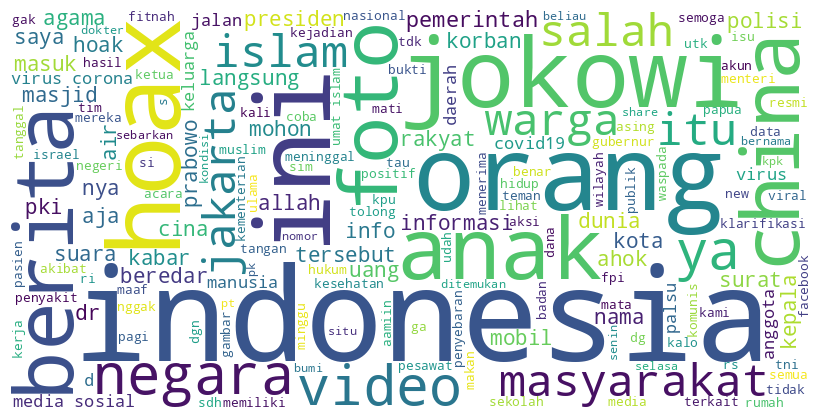

In [13]:
# Combine all descriptions into a single string by joining the 'cleaned_description' values with spaces
text = " ".join(title for title in train_df.cleaned_description)

# Create and generate a word cloud image using the combined text
wordcloud = WordCloud(width=800, height=400,  # Set the width and height of the image
                      background_color='white',  # Set the background color of the word cloud to white
                      min_font_size=10).generate(text)  # Set the minimum font size for the words

# Display the generated word cloud image
plt.figure(figsize=(8, 8), facecolor=None)  # Set the figure size for the plot
plt.imshow(wordcloud)  # Display the word cloud image
plt.axis("off")  # Turn off the axes, as they are not needed for word cloud visualization
plt.tight_layout(pad=0)  # Adjust the padding for better layout of the image
plt.show()  # Show the plot with the word cloud

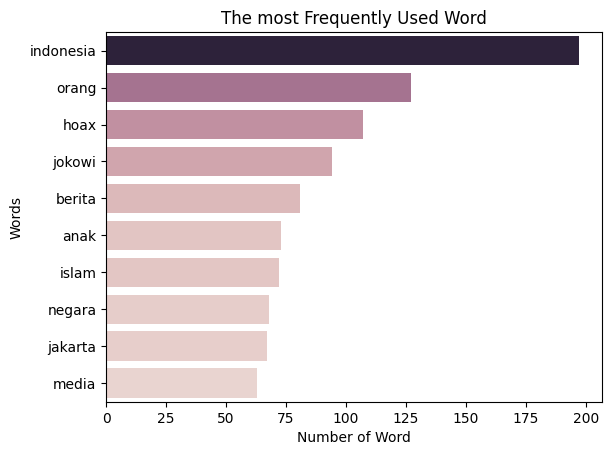

In [14]:
# Count the frequency of each word in the 'cleaned_description' column
count_df = train_df['cleaned_description'].str.lower().str.split(' ').explode().value_counts().reset_index()
# - 'str.lower()': Converts the text to lowercase to make the word count case-insensitive
# - 'str.split(' ')': Splits each text entry into individual words by spaces
# - 'explode()': Flattens the list of words into individual rows, making it easier to count occurrences
# - 'value_counts()': Counts the frequency of each word
# - 'reset_index()': Resets the index to make it easier to work with the resulting DataFrame

# Remove rows where the word is an empty string and reset the index
count_df = count_df[count_df["cleaned_description"] != ""].reset_index(drop=True)
# - Filters out empty words from the DataFrame
# - 'reset_index(drop=True)': Resets the DataFrame index after removing rows, avoiding index gaps

# Create a filter to exclude stop words from the word count
excluded_filter = count_df['cleaned_description'].isin(stop_words)
# - Checks if each word is in the stop words list, returning a boolean Series (True for stop words)

# Create a barplot of the most frequent words (excluding stop words) with the count as hue
sns.barplot(
    x = 'count', y = 'cleaned_description', hue = 'count',  # 'x' for word frequency, 'y' for words, 'hue' for color by frequency
    data = count_df[~excluded_filter].head(10),  # Filter out stop words and take top 10 most frequent words
    legend = False  # Hides the legend from the plot
).set(xlabel = 'Number of Word', ylabel = 'Words', title = 'The most Frequently Used Word')
# - 'xlabel', 'ylabel', and 'title' are set for the plot's axes and title

# Display the plot
plt.show()


## Train Test Split Data

In [15]:
# Assigning 'cleaned_description' column from the training DataFrame to the feature variable X
X = train_df['cleaned_description'].values
# - 'train_df['cleaned_description']': Extracts the cleaned descriptions (text) from the training DataFrame.
# - '.values': Converts the 'cleaned_description' column into a numpy array, which is compatible with machine learning models.

# Assigning 'label' column from the training DataFrame to the target variable y
y = train_df['label'].values
# - 'train_df['label']': Extracts the labels (i.e., 0 or 1 indicating whether the news is real or fake).
# - '.values': Converts the 'label' column into a numpy array.

# Splitting the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# - 'train_test_split()': Function from scikit-learn used to split data into training and validation sets.
# - 'X': The feature set (cleaned descriptions) is passed as input.
# - 'y': The label set (real/fake labels) is passed as input.
# - 'test_size=0.2': Specifies that 20% of the data will be used for validation, and the remaining 80% will be for training.
# - 'random_state=42': Sets a seed for randomization to ensure the split is reproducible. Using the same random state will generate the same split each time.

In [16]:
# Printing the shape (dimensions) of the training text data (X_train)
print("X_train shape : ", train_texts.shape)
# - 'train_texts.shape': Returns the shape of the numpy array 'train_texts', which contains the feature data (cleaned descriptions) for training.
# - The output will show the number of samples (rows) and the number of features (columns) in the training text data.

# Printing the shape (dimensions) of the training label data (y_train)
print("X_test shape : ", train_labels.shape)
# Printing the shape (dimensions) of the validation text data (X_test)
print("y_train shape : ", val_texts.shape)
# Printing the shape (dimensions) of the validation label data (y_test)
print("y_test shape : ", val_labels.shape)

X_train shape :  (1225,)
X_test shape :  (1225,)
y_train shape :  (307,)
y_test shape :  (307,)


# Tokenization, Padding and Embedding

**BertTokenizer**:
- This is a class from the `transformers` library provided by Hugging Face, which is used to tokenize (i.e., split into tokens) and encode text data for BERT models.
- **BERT** (Bidirectional Encoder Representations from Transformers) is a transformer-based pre-trained model used for a variety of NLP tasks.

**from_pretrained('bert-base-uncased')**:
- The `from_pretrained` method is used to load a pre-trained model or tokenizer from the Hugging Face model hub.
- In this case, it loads the BERT base model with the uncased variant.

**bert-base-uncased**:
- This refers to a BERT model with 12 layers, 768 hidden units, and 110M parameters.
- "Uncased" means that the model doesn't differentiate between uppercase and lowercase letters, so "hello" and "Hello" are treated as the same word.

**Purpose**:
- This tokenizer will be used to preprocess the text data before it is input to the BERT model.
- It converts the raw text into token IDs that BERT can understand.
- The tokenizer handles tasks such as:
  - Splitting the text into tokens (subwords, words).
  - Converting tokens into corresponding indices in the vocabulary.
  - Adding special tokens (e.g., `[CLS]` for classification, `[SEP]` for separating sequences).

**Result**:
- After running this line, the variable `tokenizer` will be ready to tokenize and encode input text data using the BERT model's vocabulary and tokenization strategy.


In [17]:
# Initialize the BERT tokenizer using a pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
# Ensure the input texts are lists
train_texts = train_texts.tolist() if not isinstance(train_texts, list) else train_texts
val_texts = val_texts.tolist() if not isinstance(val_texts, list) else val_texts

In [19]:
# Tokenize the text data
def preprocess_data(texts, labels):
    # Convert texts to a list if necessary
    if not isinstance(texts, list):
        texts = texts.tolist()  # Converts the input texts into a list if they aren't already

    # Tokenize the input texts using the tokenizer
    encodings = tokenizer(
        texts,
        truncation=True,       # Truncate texts that exceed max_length
        padding=True,          # Pad texts shorter than max_length
        max_length=512,        # Set the maximum length for each input text
        return_tensors="tf"    # Return the result as TensorFlow tensors
    )

    # Return the tokenized texts and labels as TensorFlow tensors
    return encodings, tf.convert_to_tensor(labels)


# ============================
# Preprocessing the Inference Text Data
# ============================

# Define a function to preprocess and tokenize the input text data for inference
def preprocess_data_inference(texts):
    # Convert the input 'texts' to a list if it's not already a list
    # This ensures that the input is in the correct format (list of texts) for tokenization.
    if not isinstance(texts, list):
        texts = texts.tolist()

    # Tokenize the texts using the pre-trained BERT tokenizer
    # The tokenizer will:
    # - Truncate texts that are too long to the maximum length (512 tokens in this case).
    # - Pad shorter texts to the maximum length to ensure uniform input size for BERT.
    # - Convert the texts into token IDs that can be fed into the BERT model.
    # - Return the tokenized texts as TensorFlow tensors for model input.
    encodings = tokenizer(
        texts,
        truncation=True,        # Truncate texts to the maximum length if they're too long
        padding=True,           # Pad shorter texts to the same length (max_length)
        max_length=512,         # Set the maximum length for the tokenized text
        return_tensors="tf"     # Return the result as TensorFlow tensors
    )

    # Return the tokenized text encodings
    return encodings

In [20]:
# Preprocess training and validation data
train_encodings, train_labels_tensor = preprocess_data(train_texts, train_labels)
val_encodings, val_labels_tensor = preprocess_data(val_texts, val_labels)

In [21]:
train_encodings

{'input_ids': <tf.Tensor: shape=(1225, 276), dtype=int32, numpy=
array([[  101, 19128, 11905, ...,     0,     0,     0],
       [  101,  7842, 14454, ...,     0,     0,     0],
       [  101,  7279, 12162, ...,     0,     0,     0],
       ...,
       [  101, 19337,  2239, ...,     0,     0,     0],
       [  101, 13866, 11721, ...,     0,     0,     0],
       [  101,  2678,  4487, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1225, 276), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1225, 276), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [22]:
train_labels_tensor

<tf.Tensor: shape=(1225,), dtype=int64, numpy=array([1, 0, 1, ..., 0, 1, 0])>

## Challange

Convert this sample of news headline to matrix

In [23]:
text_data = "Pemilu 2024 berjalan dengan baik"

In [24]:
preprocess_data_inference([text_data])

{'input_ids': <tf.Tensor: shape=(1, 15), dtype=int32, numpy=
array([[  101, 21877,  4328,  7630, 16798,  2549,  2022,  2099, 25787,
         2319, 26957,  2319, 21790,  2243,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 15), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 15), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

# Model Development

In this document, we explain the steps involved in developing and evaluating a BERT-based model for text classification tasks. Specifically, this workflow includes preprocessing, model prediction, confusion matrix analysis, and ROC-AUC evaluation.

In [25]:
# ============================
# Hyperparameters to experiment with
# ============================

# Learning rate for the Adam optimizer
learning_rate = 5e-5  # You can experiment with different values like 1e-5, 3e-5, or 1e-4 for tuning the model

# Batch size for training and validation datasets
train_batch_size = 8  # You can experiment with different values such as 16, 32 to see how batch size affects training speed and performance
val_batch_size = 16

# Number of epochs for training
epochs = 2  # You can increase this number (e.g., 3, 5, 10) to allow for more training cycles

In [26]:
# ============================
# Model and training setup
# ============================

# Load the pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile the model with an optimizer, loss function, and evaluation metric

# Create the Adam optimizer with the defined learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the loss function: SparseCategoricalCrossentropy
# 'from_logits=True' indicates that the model's output is raw logits and needs to be converted into probabilities
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define the evaluation metrics: SparseCategoricalAccuracy for classification tasks
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model by specifying the optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Display a summary of the model architecture
model.summary()

# Prepare training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels_tensor
)).batch(train_batch_size)  # Use the batch size defined earlier

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels_tensor
)).batch(val_batch_size)  # Use the batch size defined earlier

# Train the model
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs  # Use the number of epochs defined earlier
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
154/154 [==============================] - 123s 515ms/step - loss: 0.7010 - accuracy: 0.4988 - val_loss: 0.6823 - val_accuracy: 0.5440
Epoch 2/2
154/154 [==============================] - 79s 515ms/step - loss: 0.6915 - accuracy: 0.5453 - 

In [27]:
# ============================
# Evaluate the model
# ============================

# Use the model to evaluate its performance on the validation dataset
# The `evaluate()` function returns the loss value and any other metrics defined during model compilation
results = model.evaluate(val_dataset)

# Print out the evaluation results (loss and accuracy)
print(f"Validation results: {results}")

# Print out the modelling development time (from loading the data to model ready to serve)
print("Total Execution Time : ", time.time() - start)

20/20 [==============================] - 7s 367ms/step - loss: 0.6789 - accuracy: 0.5440
Validation results: [0.6788915395736694, 0.5439739227294922]
Total Execution Time :  468.5653474330902


In [28]:
# ============================
# Save the fine-tuned model
# ============================

# Save the trained BERT model to a specified directory
# The model is saved in the 'news_classification' directory, including the model weights and configuration
model.save_pretrained('news_classification')

# Save the tokenizer used for encoding the input data to the same directory
# The tokenizer is essential for preprocessing new input data to match the format expected by the model
tokenizer.save_pretrained('news_classification')


('news_classification/tokenizer_config.json',
 'news_classification/special_tokens_map.json',
 'news_classification/vocab.txt',
 'news_classification/added_tokens.json')

# Model Evaluation

In [29]:
# ===============================
# Confusion Matrix with Values and Percentages
# ===============================
def plot_confusion_matrix_with_percentages(y_true, y_pred, class_names):
    """
    Plots a confusion matrix with both raw values and percentages.
    """
    cm = confusion_matrix(y_true, y_pred)  # Generate confusion matrix
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Compute percentages

    # Combine raw values and percentages
    cm_display = np.asarray([[f"{value} ({percentage:.2f}%)"
                              for value, percentage in zip(row, row_percentage)]
                             for row, row_percentage in zip(cm, cm_percentage)])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=cm_display, fmt='', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix with Raw Values and Percentages")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# ===============================
# ROC-AUC Curve Plot
# ===============================
def plot_roc_auc(y_true, logits, class_names):
    """
    Plots the ROC-AUC curve for the model's predictions.
    """
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_true, logits[:, 1])  # Use probabilities for the positive class (Fake News)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

154/154 [==============================] - 33s 172ms/step


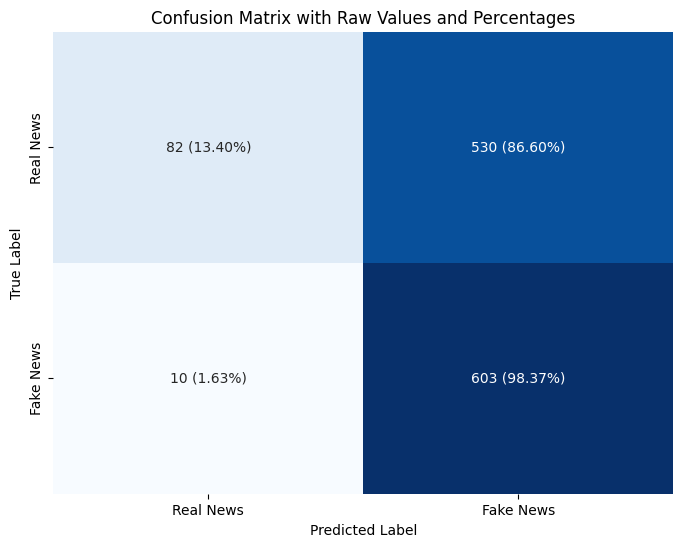

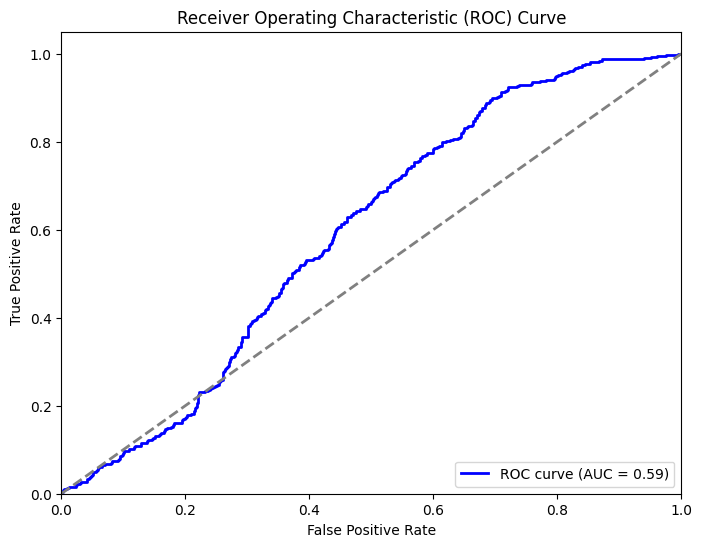

Test Loss: 0.6715
Test Accuracy: 0.5592


In [30]:
# ===============================
# Model Prediction on Test Data
# ===============================
# Perform predictions using the fine-tuned model
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
logits = model.predict(train_dataset).logits

# Convert logits to predicted class labels
y_pred = np.argmax(logits, axis=-1)  # Argmax to select class with highest probability

# Define class names for labels
class_names = ['Real News', 'Fake News']

# Plot confusion matrix
plot_confusion_matrix_with_percentages(y_train, y_pred, class_names)

# Plot ROC-AUC curve
plot_roc_auc(y_train, logits, class_names)

# ===============================
# Print Final Evaluation Results
# ===============================
# Accuracy and other metrics
loss, accuracy = model.evaluate(train_dataset, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


20/20 [==============================] - 10s 361ms/step


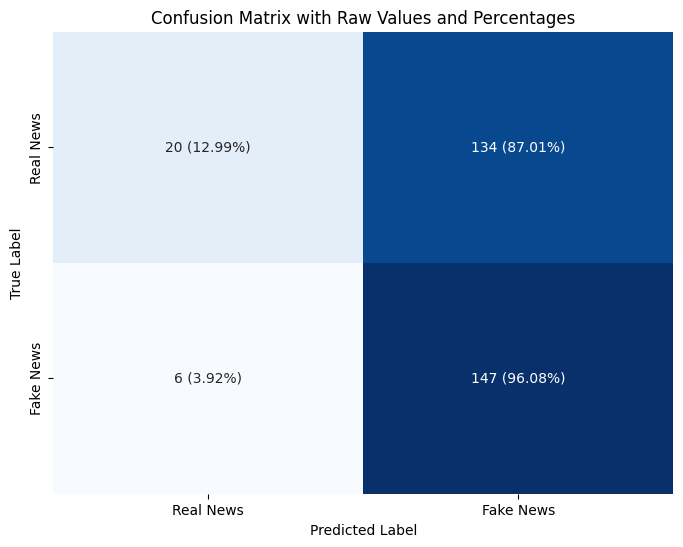

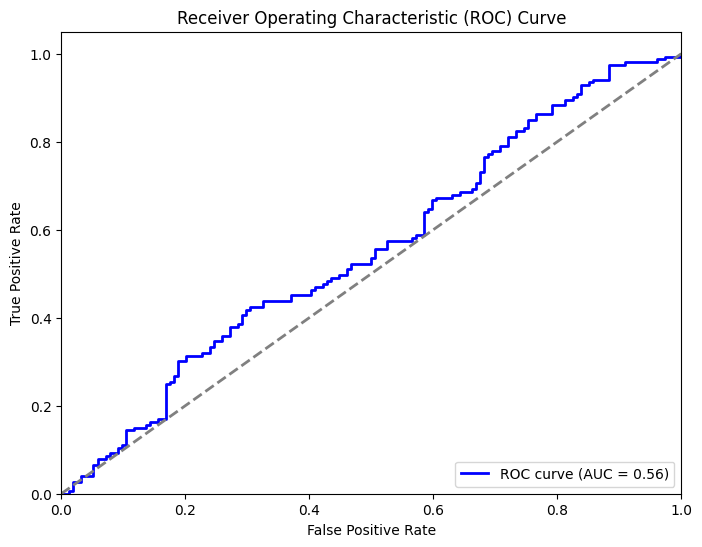

Test Loss: 0.6789
Test Accuracy: 0.5440


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import tensorflow as tf

# ===============================
# Model Prediction on Test Data
# ===============================
# Perform predictions using the fine-tuned model
y_valid = np.concatenate([y for x, y in val_dataset], axis=0)
logits = model.predict(val_dataset).logits

# Convert logits to predicted class labels
y_pred = np.argmax(logits, axis=-1)  # Argmax to select class with highest probability

# Define class names for labels
class_names = ['Real News', 'Fake News']

# Plot confusion matrix
plot_confusion_matrix_with_percentages(y_valid, y_pred, class_names)

# Plot ROC-AUC curve
plot_roc_auc(y_valid, logits, class_names)

# ===============================
# Print Final Evaluation Results
# ===============================
# Accuracy and other metrics
loss, accuracy = model.evaluate(val_dataset, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


# Model Inference

In [34]:
# ============================
# Prediction
# ============================

# Select a specific text (news article) from the test dataset for inference
# Here, we are choosing the third row (index 2) from the 'narasi' column of the test dataset.
# test_inference = test_df["narasi"][1]
test_inference = train_df["narasi"][1]

# Print the selected text to check what will be used for prediction
# This allows you to see the content of the text before passing it to the model for inference.
print(test_inference)
print(train_df["label"][1])

Beredar Info yang di sebar di sosmed bahwa presiden Joko Widodo menerima saksi ahli dari mesir di Istana atau mendatangkan untuk membantu terlapor
0


In [35]:
# ============================
# Preprocess the Inference Text
# ============================

# Remove stop words from the selected test_inference text
# The 'remove_stop_words' function removes common words (like "the", "and", etc.) that don't contribute to the meaning of the sentence.
test_inference = remove_stop_words(test_inference)

# Remove punctuation from the test_inference text
# The 'remove_punctuation' function removes any punctuation characters (like periods, commas, etc.) from the text.
# This is useful because punctuation doesn't generally add value for most NLP models.
test_inference = remove_punctuation(test_inference)

# Output the processed text to verify the changes
# After stop words and punctuation have been removed, this line prints the cleaned text.
# This will help ensure the text is properly preprocessed before being passed to the model for prediction.
test_inference


'Beredar Info sebar sosmed presiden Joko Widodo menerima saksi ahli mesir Istana membantu terlapor'

In [36]:
# ============================
# Tokenize the Inference Text
# ============================

# Preprocess and tokenize the single inference text (test_inference) using the previously defined preprocess_data_inference function
# The input is passed as a list containing a single text, as the function expects a list of texts.
inference_encodings = preprocess_data_inference([test_inference])

# Display the tokenized encodings for the inference text
inference_encodings


{'input_ids': <tf.Tensor: shape=(1, 38), dtype=int32, numpy=
array([[  101,  2022,  5596,  2906, 18558,  7367,  8237,  2061,  6491,
         2098,  3653,  7363,  2078,  8183,  3683, 15536,  3527,  3527,
         2273, 11124,  2863,  7842,  5705,  2072, 18347,  2072,  2033,
        29481, 21541,  5162,  2033, 11201,  3372,  2226, 28774,  2721,
        17822,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 38), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 38), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [37]:
# ==============================
# Model Inference and Prediction
# ==============================

# Tokenizing the test_inference text for model input
# The tokenizer converts the raw text into token IDs, truncates or pads the text to a maximum length of 512, and prepares the input for the BERT model.
inputs = tokenizer(test_inference, return_tensors="tf", truncation=True, padding=True, max_length=512)

# Pass the tokenized inputs to the model for prediction
# The **inputs syntax unpacks the dictionary (inputs) into keyword arguments, which is required for the model to process the data.
# The model generates raw output logits, which are unnormalized predictions.
logits = model(**inputs).logits

# Convert the logits into class predictions by selecting the class with the highest score
# tf.argmax returns the index of the highest logit value, which corresponds to the predicted class.
# .numpy()[0] converts the prediction to a NumPy array and selects the first (and only) element (since it's a single prediction).
prediction = tf.argmax(logits, axis=-1).numpy()[0]

# Output the prediction as "Fake News" or "Real News" based on the predicted class (1 or 0)
print("Fake News" if prediction == 1 else "Real News")

Fake News


In [38]:
text_data = "contoh kata"

In [39]:
encoding_text = preprocess_data_inference([text_data])
encoding_text

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[  101,  9530,  3406,  2232, 29354,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [40]:
inp = tokenizer(text_data, return_tensors="tf", truncation=True, padding=True, max_length=512)
inp

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[  101,  9530,  3406,  2232, 29354,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [41]:
from tensorflow.keras.models import save_model

# Save ke format .h5
model.save("model_hoax.h5")

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [42]:
model.save("model_dir", save_format="tf")  # Format SavedModel
model.save_weights("model_weights.h5")
